In [1]:
# Adapted from the code on https://www.tensorflow.org/tutorials/images/cnn 
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow.keras import datasets, layers, models, regularizers
import matplotlib.pyplot as plt


In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

In [4]:
with tf.device('/CPU:0'):
  model_0 = models.Sequential([
    layers.Flatten(),
    layers.Dense(10, activation="softmax")
    ])

  model_0.compile(optimizer="adam",
                  loss = "sparse_categorical_crossentropy",
                  metrics=["accuracy"])

  history_0 = model_0.fit(train_images, train_labels, epochs=150,
                        validation_data=(test_images, test_labels))

  model_0_test_loss, model_0_test_acc = model_0.evaluate(test_images, test_labels)

Epoch 1/150
1563/1563 [==============================] - 2s 1ms/step - loss: 1.9677 - accuracy: 0.3153 - val_loss: 1.9682 - val_accuracy: 0.3047
Epoch 2/150
1563/1563 [==============================] - 1s 836us/step - loss: 1.8885 - accuracy: 0.3515 - val_loss: 2.0466 - val_accuracy: 0.2955
Epoch 3/150
1563/1563 [==============================] - 1s 804us/step - loss: 1.8539 - accuracy: 0.3629 - val_loss: 1.9282 - val_accuracy: 0.3360
Epoch 4/150
1563/1563 [==============================] - 1s 883us/step - loss: 1.8456 - accuracy: 0.3691 - val_loss: 1.8271 - val_accuracy: 0.3608
Epoch 5/150
1563/1563 [==============================] - 1s 868us/step - loss: 1.8333 - accuracy: 0.3727 - val_loss: 1.8221 - val_accuracy: 0.3678
Epoch 6/150
1563/1563 [==============================] - 1s 791us/step - loss: 1.8215 - accuracy: 0.3766 - val_loss: 1.8246 - val_accuracy: 0.3661
Epoch 7/150
1563/1563 [==============================] - 1s 777us/step - loss: 1.8172 - accuracy: 0.3807 - val_loss: 1.8

In [5]:
model_0.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                30730     
Total params: 30,730
Trainable params: 30,730
Non-trainable params: 0
_________________________________________________________________


In [8]:
with tf.device('/CPU:0'):
  model_1 = models.Sequential([
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax")
  ])

  model_1.compile(optimizer = "adam",
                  loss = "sparse_categorical_crossentropy",
                  metrics=["accuracy"])

  history_1 = model_1.fit(train_images, train_labels, epochs=150,
                        validation_data = (test_images, test_labels))

  model_1_test_loss, model_1_test_acc = model_1.evaluate(test_images, test_labels)

Epoch 1/150
1563/1563 [==============================] - 2s 1ms/step - loss: 1.9214 - accuracy: 0.3127 - val_loss: 1.8013 - val_accuracy: 0.3687
Epoch 2/150
1563/1563 [==============================] - 2s 1ms/step - loss: 1.7716 - accuracy: 0.3697 - val_loss: 1.7329 - val_accuracy: 0.3807
Epoch 3/150
1563/1563 [==============================] - 1s 952us/step - loss: 1.7263 - accuracy: 0.3858 - val_loss: 1.6782 - val_accuracy: 0.4061
Epoch 4/150
1563/1563 [==============================] - 1s 935us/step - loss: 1.6988 - accuracy: 0.3963 - val_loss: 1.7012 - val_accuracy: 0.3872
Epoch 5/150
1563/1563 [==============================] - 1s 925us/step - loss: 1.6754 - accuracy: 0.4019 - val_loss: 1.6451 - val_accuracy: 0.4130
Epoch 6/150
1563/1563 [==============================] - 1s 944us/step - loss: 1.6550 - accuracy: 0.4090 - val_loss: 1.6315 - val_accuracy: 0.4213
Epoch 7/150
1563/1563 [==============================] - 2s 1ms/step - loss: 1.6426 - accuracy: 0.4162 - val_loss: 1.6308 

In [9]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                196672    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 197,322
Trainable params: 197,322
Non-trainable params: 0
_________________________________________________________________


In [10]:
with tf.device('/CPU:0'):
    model_2 = models.Sequential([
        layers.Flatten(),
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model_2.compile(optimizer="adam",
                    loss = "sparse_categorical_crossentropy",
                    metrics=["accuracy"])

    history_2 = model_2.fit(train_images, train_labels, epochs=150,
                            validation_data=(test_images, test_labels))

    model_2_test_loss, model_2_test_acc = model_2.evaluate(test_images, test_labels)

Epoch 1/150
1563/1563 [==============================] - 2s 1ms/step - loss: 1.8909 - accuracy: 0.3100 - val_loss: 1.7667 - val_accuracy: 0.3614
Epoch 2/150
1563/1563 [==============================] - 2s 1ms/step - loss: 1.7418 - accuracy: 0.3666 - val_loss: 1.6719 - val_accuracy: 0.3934
Epoch 3/150
1563/1563 [==============================] - 1s 953us/step - loss: 1.6919 - accuracy: 0.3863 - val_loss: 1.6384 - val_accuracy: 0.4124
Epoch 4/150
1563/1563 [==============================] - 2s 1ms/step - loss: 1.6584 - accuracy: 0.4006 - val_loss: 1.6699 - val_accuracy: 0.3999
Epoch 5/150
1563/1563 [==============================] - 2s 969us/step - loss: 1.6401 - accuracy: 0.4055 - val_loss: 1.6447 - val_accuracy: 0.4073
Epoch 6/150
1563/1563 [==============================] - 2s 990us/step - loss: 1.6244 - accuracy: 0.4147 - val_loss: 1.6648 - val_accuracy: 0.4075
Epoch 7/150
1563/1563 [==============================] - 2s 994us/step - loss: 1.6149 - accuracy: 0.4168 - val_loss: 1.6245 

In [11]:
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                196672    
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                650       
Total params: 201,482
Trainable params: 201,482
Non-trainable params: 0
_________________________________________________________________


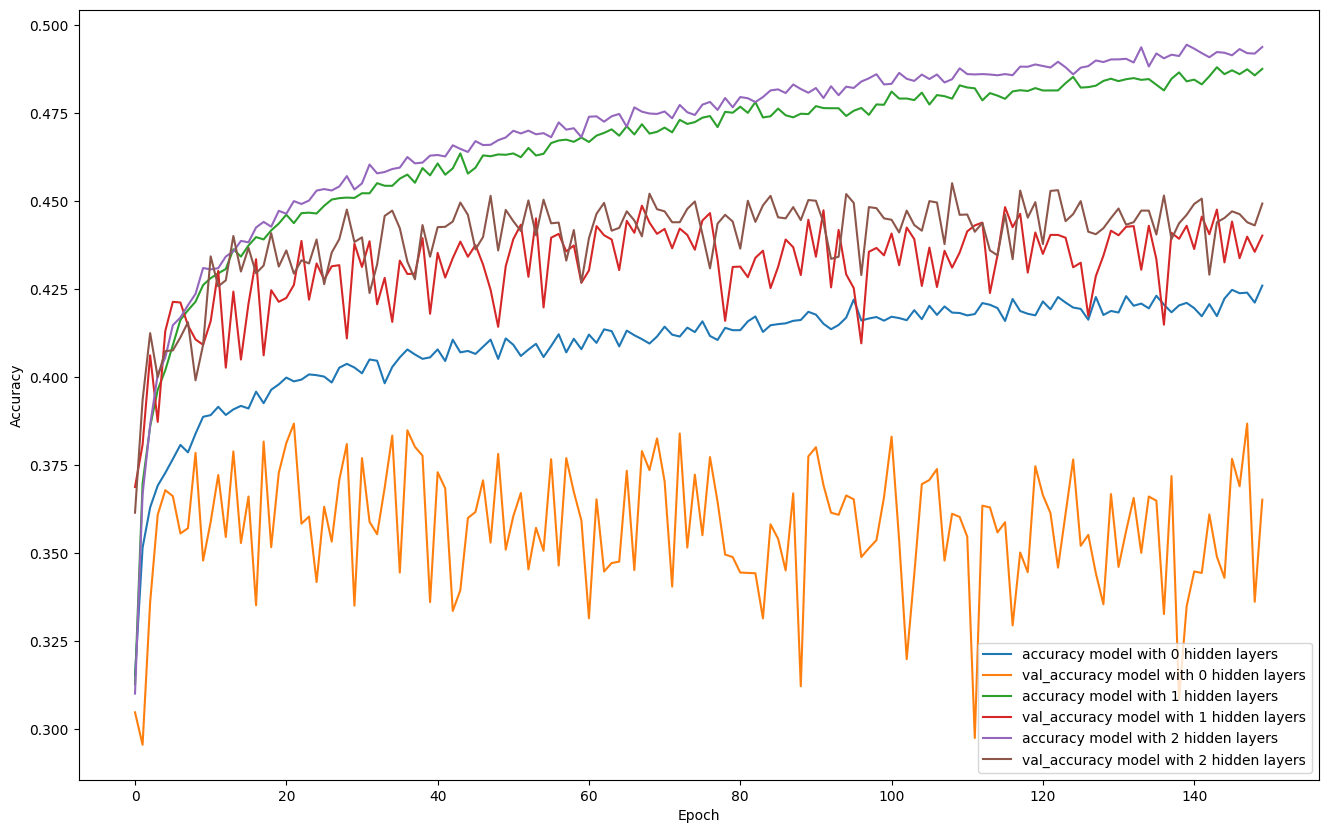

In [12]:
plt.figure(figsize=(16,10))
for i, hist in enumerate([history_0, history_1, history_2]):
    plt.plot(hist.history['accuracy'], label=f'accuracy model with {i} hidden layers')
    plt.plot(hist.history['val_accuracy'], label = f'val_accuracy model with {i} hidden layers')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
plt.show()


In [14]:
with tf.device('/CPU:0'):
    model_20 = models.Sequential([
    layers.Flatten(),
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
    ])

    model_20.compile(optimizer="adam",
                    loss = "sparse_categorical_crossentropy",
                    metrics=["accuracy"])

    history_20 = model_20.fit(train_images, train_labels, epochs=1000,
                        validation_data=(test_images, test_labels))

    model_20_test_loss, model_20_test_acc = model_20.evaluate(test_images, test_labels)

Epoch 1/1000
1563/1563 [==============================] - 8s 5ms/step - loss: 1.8809 - accuracy: 0.3281 - val_loss: 1.7301 - val_accuracy: 0.3803
Epoch 2/1000
1563/1563 [==============================] - 7s 5ms/step - loss: 1.7069 - accuracy: 0.3901 - val_loss: 1.6344 - val_accuracy: 0.4186
Epoch 3/1000
1563/1563 [==============================] - 7s 4ms/step - loss: 1.6426 - accuracy: 0.4151 - val_loss: 1.6363 - val_accuracy: 0.4120
Epoch 4/1000
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5965 - accuracy: 0.4310 - val_loss: 1.6216 - val_accuracy: 0.4169
Epoch 5/1000
1563/1563 [==============================] - 7s 5ms/step - loss: 1.5736 - accuracy: 0.4421 - val_loss: 1.5854 - val_accuracy: 0.4370
Epoch 6/1000
1563/1563 [==============================] - 7s 5ms/step - loss: 1.5476 - accuracy: 0.4496 - val_loss: 1.5466 - val_accuracy: 0.4391
Epoch 7/1000
1563/1563 [==============================] - 9s 6ms/step - loss: 1.5262 - accuracy: 0.4598 - val_loss: 1.5836 -

KeyboardInterrupt: 

In [ ]:
model_20.summary()

In [ ]:
plt.figure(figsize=(16,10))
plt.plot(history_20.history['accuracy'], label='accuracy')
plt.plot(history_20.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()